In [16]:
# The guide for the practice is taken from https://github.com/weijie-chen/Time-Series-and-Financial-Engineering-With-Python
#https://github.com/weijie-chen/Time-Series-and-Financial-Engineering-With-Python/blob/main/notebooks/time_series_analysis/Chapter%201%20-%20Time%20Series%20Manipulation.ipynb

import pandas as pd 
import numpy 
import yfinance as yf
import matplotlib.pyplot as plt 


[*********************100%***********************]  1 of 1 completed


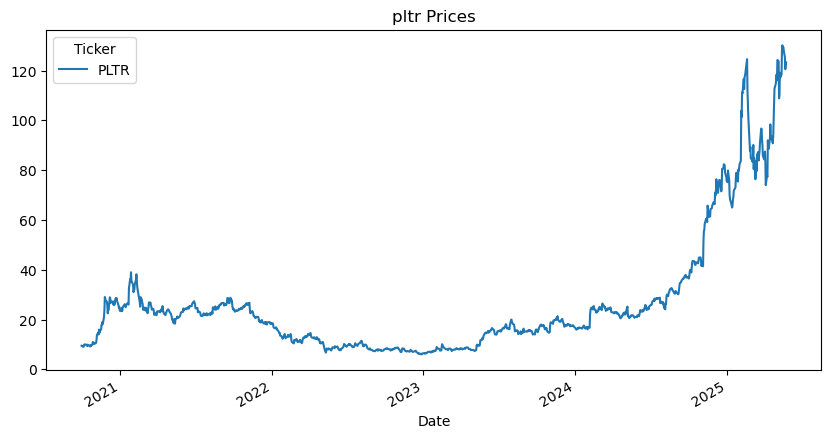

In [17]:
"""Weekday distributions for stocks"""
Data = input("Enter the stock ticker symbol (e.g., AAPL, MSFT): ")
Prices = yf.download(Data)
Prices.isnull().sum()
Prices["Close"].plot(title= Data + ' Prices', figsize=(10, 5))
plt.show()

                 Mean  Standard Deviation
W-MON close  0.002119            0.045434
W-TUE close  0.006299            0.053617
W-WED close  0.001675            0.043650
W-THU close  0.001834            0.044672
W-FRI close  0.004100            0.042493
{'STD': Ticker
PLTR    0.046142
dtype: float64, 'MEAN': Ticker
PLTR    0.003232
dtype: float64}


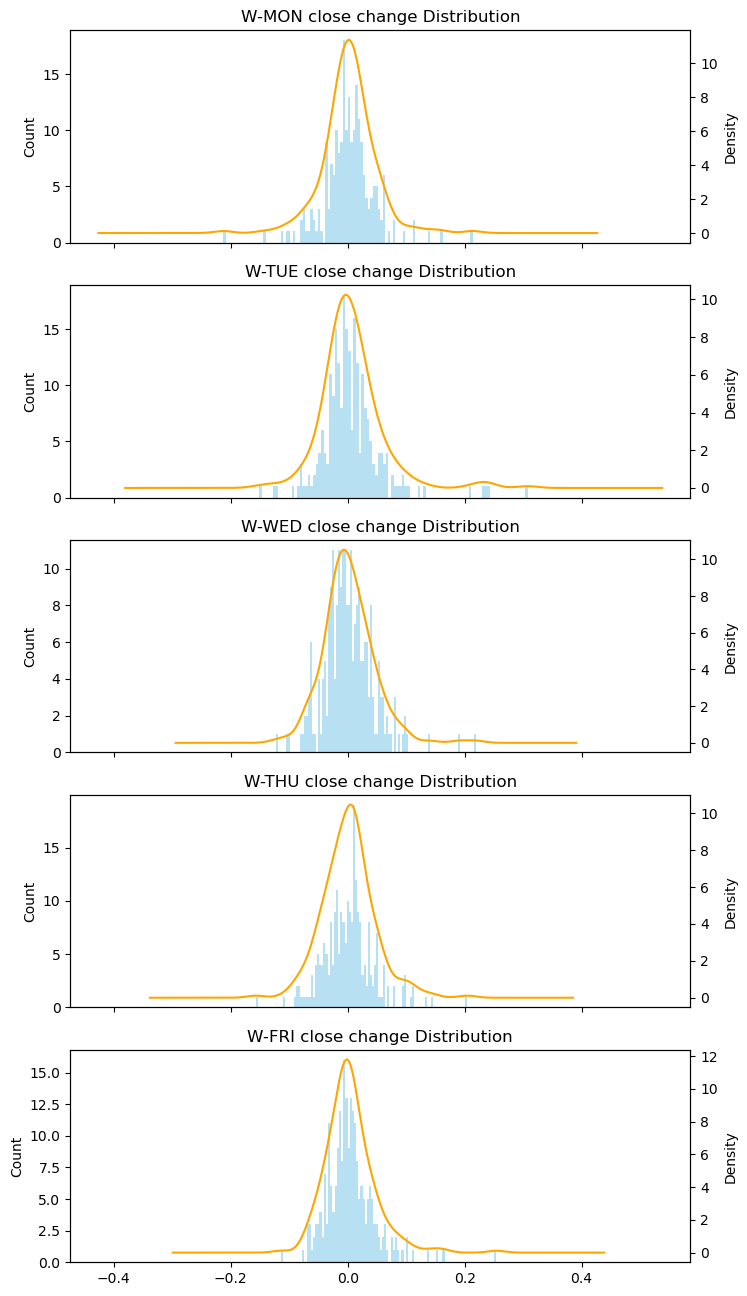

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

Prices = (Prices / Prices.shift()) - 1

weekday_returns = {}
for day in ["W-MON", "W-TUE", "W-WED", "W-THU", "W-FRI"]:
    Priceday = Prices['Close'].asfreq(day)
    weekday_returns[day + " close"] = Priceday.dropna()

weekprices = pd.concat(weekday_returns.values(), axis=1)
weekprices.columns = list(weekday_returns.keys())

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 16), sharex=True)

for ax, (col, data) in zip(axes, weekprices.items()):
    # Histogram on primary y-axis
    n, bins, patches = ax.hist(data, bins=100, alpha=0.6, color='skyblue', label='Histogram')
    ax.set_ylabel("Count")
    ax.set_title(f"{col} change Distribution")
    
    # Density on secondary y-axis
    ax2 = ax.twinx()
    data.plot.kde(ax=ax2, color='orange', label='Density')



# Calculate stats
weekprices_stats = pd.DataFrame({
'Mean': weekprices.mean(),
'Standard Deviation': weekprices.std()
})

STD = Prices["Close"].std()
MEAN = Prices["Close"].mean()
print(weekprices_stats)
print({"STD" : STD, "MEAN" : MEAN})